# Artificial Neural Network

In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the dataset

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
X = dataset.iloc[:,3:13]
Y = dataset.iloc[:,13]

# Create dummy variables

In [4]:
X = pd.get_dummies(X)

In [5]:
X.shape

(10000, 13)

# Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Feature Scaling

In [8]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [10]:
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim=13))
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units= 1 , kernel_initializer = 'glorot_uniform' , activation = 'sigmoid'))

In [11]:

classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy',metrics = ['accuracy'])

In [12]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 84        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_history = classifier.fit(X_train,Y_train,validation_split=0.33,  epochs = 100)

Epoch 1/100
168/168 [==============================] - 1s 4ms/step - loss: 0.5709 - accuracy: 0.7848 - val_loss: 0.5289 - val_accuracy: 0.7910
Epoch 2/100
168/168 [==============================] - 0s 3ms/step - loss: 0.5151 - accuracy: 0.7962 - val_loss: 0.5014 - val_accuracy: 0.7910
Epoch 3/100
168/168 [==============================] - 0s 3ms/step - loss: 0.4944 - accuracy: 0.7962 - val_loss: 0.4888 - val_accuracy: 0.7910
Epoch 4/100
168/168 [==============================] - 0s 2ms/step - loss: 0.4820 - accuracy: 0.7962 - val_loss: 0.4805 - val_accuracy: 0.7910
Epoch 5/100
168/168 [==============================] - 0s 3ms/step - loss: 0.4733 - accuracy: 0.7962 - val_loss: 0.4742 - val_accuracy: 0.7910
Epoch 6/100
168/168 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.7962 - val_loss: 0.4687 - val_accuracy: 0.7910
Epoch 7/100
168/168 [==============================] - 0s 2ms/step - loss: 0.4596 - accuracy: 0.7962 - val_loss: 0.4640 - val_accuracy: 0.7910

Epoch 58/100
168/168 [==============================] - 0s 2ms/step - loss: 0.3778 - accuracy: 0.8475 - val_loss: 0.4000 - val_accuracy: 0.8379
Epoch 59/100
168/168 [==============================] - 0s 2ms/step - loss: 0.3757 - accuracy: 0.8492 - val_loss: 0.3981 - val_accuracy: 0.8398
Epoch 60/100
168/168 [==============================] - 0s 2ms/step - loss: 0.3738 - accuracy: 0.8494 - val_loss: 0.3965 - val_accuracy: 0.8398
Epoch 61/100
168/168 [==============================] - 0s 2ms/step - loss: 0.3718 - accuracy: 0.8496 - val_loss: 0.3946 - val_accuracy: 0.8410
Epoch 62/100
168/168 [==============================] - 0s 2ms/step - loss: 0.3700 - accuracy: 0.8513 - val_loss: 0.3928 - val_accuracy: 0.8413
Epoch 63/100
168/168 [==============================] - 0s 2ms/step - loss: 0.3683 - accuracy: 0.8528 - val_loss: 0.3911 - val_accuracy: 0.8429
Epoch 64/100
168/168 [==============================] - 0s 2ms/step - loss: 0.3664 - accuracy: 0.8528 - val_loss: 0.3895 - val_accuracy:

In [14]:
import tensorflow as tf

In [15]:
tf.__version__

'2.3.1'

In [16]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


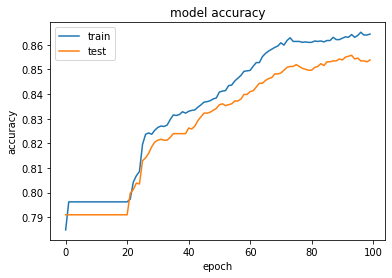

In [17]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


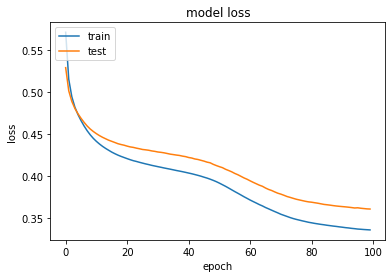

In [18]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results

In [19]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [21]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,Y_test)


In [22]:
score

0.8595